In [1]:
#import the library
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
import seaborn as sns
import rpy2.rinterface_lib.callbacks
import logging
import scirpy
import anndata
from rpy2.robjects import pandas2ri
import anndata2ri

import importlib
import warnings
warnings.filterwarnings("ignore")

import pickle as pkl
from matplotlib.colors import LinearSegmentedColormap
from sccd45ra import cd45ra_infer

In [2]:
adata=sc.read_h5ad('F:/Transwell/CRC_data/CRC.h5ad')

In [3]:
meta_data = pd.read_csv('F:/Transwell/CRC_data/Epithelial_metadata.csv',index_col = 0)

In [4]:
meta_data

,nCount_RNA,nFeature_RNA,percent.mt,sample.ID,patient.ID,sample.origin,dataset,cell.type,iCMS,msi
cell.ID,,,,,,,,,,
CRC16_MUX8563_AAACGGGGTCGATTGT-1,20834,5099,17.969349,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS
CRC16_MUX8563_AAAGATGCAGAAGCAC-1,17641,4759,23.734351,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS
CRC16_MUX8563_AAAGCAATCTAACGGT-1,6323,2580,24.403016,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,Normal,MSS
CRC16_MUX8563_ACAGCCGGTCTCTTAT-1,6873,2499,11.020450,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS
CRC16_MUX8563_ACAGCTATCCGTCATC-1,16476,4937,23.243570,MUX8563,CRC2794,Tumor,CRC-SG1,Epithelial,iCMS2,MSS
...,...,...,...,...,...,...,...,...,...,...
KUL5_EXT129_CTGTGCTTCGCTTGTC-1,8000,2926,15.401077,EXT129,SC044,Normal,KUL5,Epithelial,Normal,MSI-H
KUL5_EXT129_GAAATGAGTTCCTCCA-1,28255,5779,13.561872,EXT129,SC044,Normal,KUL5,Epithelial,Normal,MSI-H
KUL5_EXT129_GATCGCGTCTGCTGTC-1,11016,3934,19.530070,EXT129,SC044,Normal,KUL5,Epithelial,Normal,MSI-H


In [5]:
adata.obs = meta_data.loc[adata.obs_names,:]

In [6]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [7]:
#This pallete is for colorblinds
my_palette = ['#0351A8','#8CB0E0','#D56D11','#FFBB78','#234E08','#53CB8B','#D30083','#CB788D','#4E195A','#C58CCF','#AA290F','#B03FD1','#E8BCCF','#64605F','#B2AD9A','#D2D30B','#D1BD4F','#06DCF2','#9EDAE5','#517219','#5B43CF','#D92F24','#FFD900','#002F33','#B8A3A3']

In [8]:
from matplotlib.colors import LinearSegmentedColormap
values = [0,1]
colors = [(227, 227, 227), (255, 42, 18)]
norm = plt.Normalize(min(values), max(values))
my_cmap = LinearSegmentedColormap.from_list(
    '', [(norm(value), tuple(np.array(color) / 255)) for value, color in zip(values, colors)])

In [7]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(dpi=200, dpi_save=300)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
.libPaths(.libPaths('C:\\Users\\16220\\AppData\\Local\\R\\win-library\\4.3'))

# Load all the R libraries we will be using in the notebook
library(scran)
library(Seurat)
library(RColorBrewer)
library(slingshot)
library(monocle)
library(gam)
library(ggplot2)
library(plyr)
library(MAST)
library(clusterExperiment)
library(monocle3)

Exception ignored from cffi callback <function _consolewrite_ex at 0x0000027CA5292550>:
Traceback (most recent call last):
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 0: invalid continuation byte
Exception ignored from cffi callback <function _consolewrite_ex at 0x0000027CA5292550>:
Traceback (most recent call last):
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Exception ignored from cffi callback <function _consolewrite_ex at 0x0000027CA5292550>:
Traceback (most recent call last):
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 1: invalid continuation byte
Exception ignored from cffi callback <function _consolewrite_ex at 0x0000027CA5292550>:
Traceback (most recent call last):
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\rpy2\rinterface_lib\

In [14]:
adata

AnnData object with n_obs × n_vars = 49155 × 33287
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample.ID', 'patient.ID', 'sample.origin', 'dataset', 'cell.type', 'iCMS', 'msi'

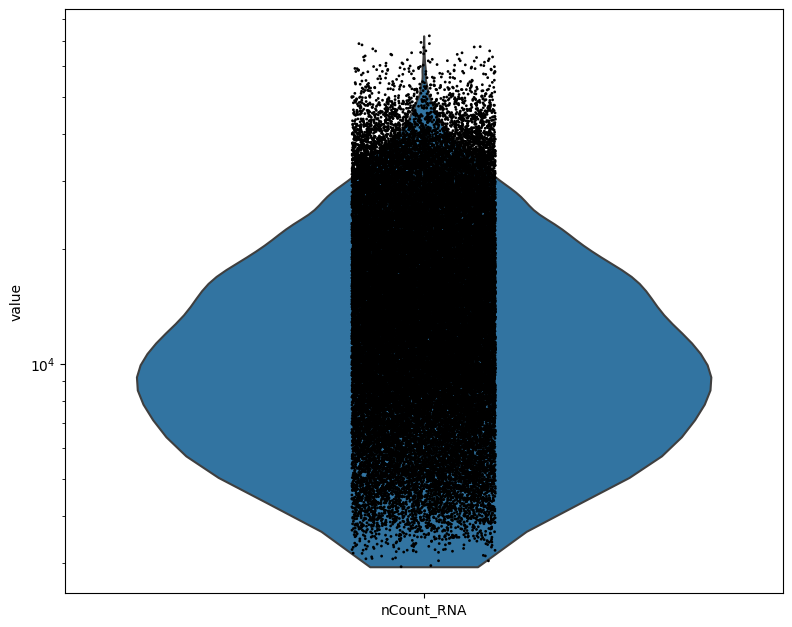

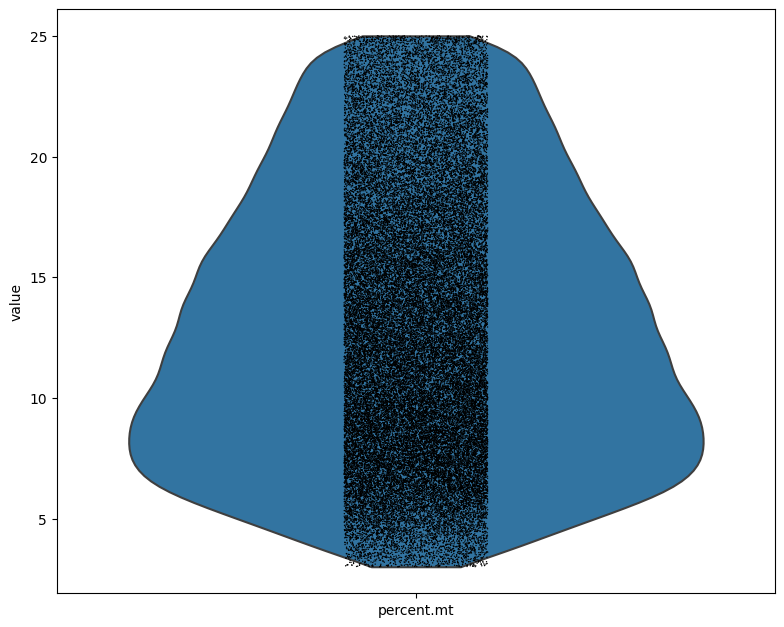

In [16]:
# Quality control - plot QC metrics
t1 = sc.pl.violin(adata, 'nCount_RNA', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'percent.mt')

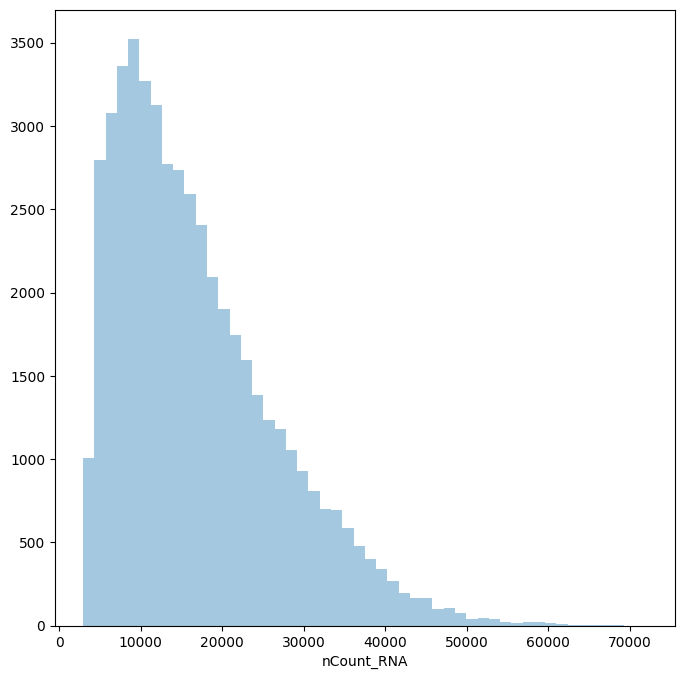

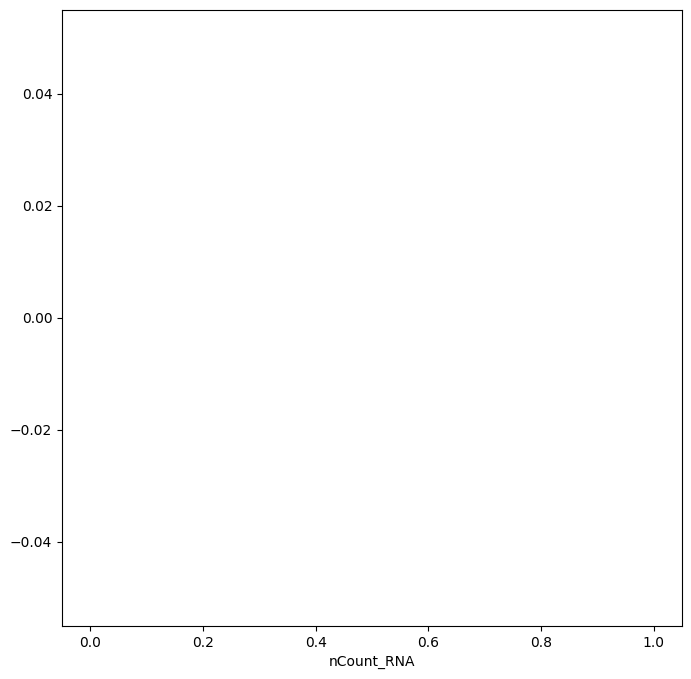

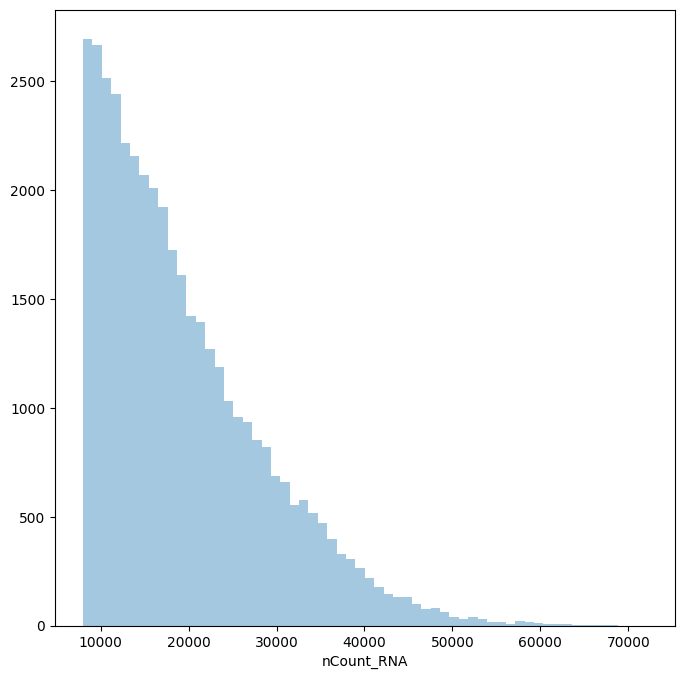

In [20]:
#Thresholding decision: counts
p3 = sns.distplot(adata.obs['nCount_RNA'], kde=False)
plt.show()

p4 = sns.distplot(adata.obs['nCount_RNA'][adata.obs['nCount_RNA']<2000], kde=False, bins=30)
plt.show()

p5 = sns.distplot(adata.obs['nCount_RNA'][adata.obs['nCount_RNA']>8000], kde=False, bins=60)
plt.show()

In [9]:
sc.pp.normalize_total(adata, key_added = 'normalization_factors')
sc.pp.log1p(adata)

In [10]:
def DE_to_df(_adata, rank_key, _padj_thresh=0.05, _logfc_thresh=1):
    def process_genes(i, direction):
        _log2foldmask = (_adata.uns[rank_key]['logfoldchanges'][i].astype('double') >= _logfc_thresh) if direction == "up" else (_adata.uns[rank_key]['logfoldchanges'][i].astype('double') <= -_logfc_thresh)
        _pvalmask = _adata.uns[rank_key]['pvals_adj'][i].astype('double') <= _padj_thresh
        _additional = pd.DataFrame({
            i: _adata.uns[rank_key]['names'][i].astype('str')[_log2foldmask & _pvalmask],
            'logfoldchanges_'+i: np.abs(_adata.uns[rank_key]['logfoldchanges'][i].astype('double')[_log2foldmask & _pvalmask])
        })
        _ribo_gene_mask = [gene.startswith('RPL') or gene.startswith('RPS') for gene in _additional[i]]
        _mt_gene_mask = [gene.startswith('MT-') for gene in _additional[i]]
        if len(_ribo_gene_mask)>0 and len(_mt_gene_mask)>0:
            _drop_id = np.array(np.array(_ribo_gene_mask) | np.array(_mt_gene_mask))
            _additional = _additional.sort_values(by='logfoldchanges_'+i, ascending=False)
            _additional = _additional.iloc[_drop_id==False, :].reset_index(drop=True)
        return _additional
    _pass_genes_up = pd.DataFrame()
    _pass_genes_down = pd.DataFrame()
    for i in set(_adata.uns[rank_key]['pvals_adj'].dtype.names):
        _pass_genes_up = pd.concat([_pass_genes_up, process_genes(i, "up")[i]], ignore_index=False, axis=1)
        _pass_genes_down = pd.concat([_pass_genes_down, process_genes(i, "down")[i]], ignore_index=False, axis=1)
    return _pass_genes_up, _pass_genes_down

In [11]:
sc.tl.rank_genes_groups(adata, groupby='iCMS', key_added='rank',method = 'wilcoxon')
[pass_genes_up, pass_genes_down] = DE_to_df(adata, rank_key='rank', _padj_thresh = 0.01, _logfc_thresh = 2)

In [12]:
ICMS2 = pass_genes_up['iCMS2'].dropna().tolist()

In [13]:
ICMS3 = pass_genes_up['iCMS3'].dropna().tolist()

In [14]:
CRC_DEG = ICMS2+ICMS3

In [15]:
transwell_forvis = sc.read_h5ad('F:/Transwell/Processed_control_only.h5ad')

In [16]:
CRC_DEG_TW = transwell_forvis[:,transwell_forvis.var_names.isin(CRC_DEG)]
CRC_DEG_CRC = adata[:,adata.var_names.isin(CRC_DEG)] 

In [18]:
CRC_df = pd.DataFrame(CRC_DEG_CRC.X.A)
CRC_df.index = CRC_DEG_CRC.obs['iCMS']
CRC_df.columns = CRC_DEG_CRC.var_names
TW_df = pd.DataFrame(CRC_DEG_TW.X.A)
TW_df.index = CRC_DEG_TW.obs['Detailed Abbrv']
TW_df.columns = CRC_DEG_TW.var_names

In [19]:
TW_df[CRC_df.columns[~CRC_df.columns.isin(TW_df.columns)].tolist()] = np.zeros([TW_df.shape[0],len(CRC_df.columns[~CRC_df.columns.isin(TW_df.columns)].tolist())])

In [20]:
TW_df = TW_df.loc[:,CRC_DEG]
CRC_df = CRC_df.loc[:,CRC_DEG]

In [21]:
averaged_twdf = TW_df.groupby(TW_df.index).mean()
averaged_crcdf =CRC_df.groupby(CRC_df.index).mean()

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
similarity_matrix = cosine_similarity(averaged_twdf,averaged_crcdf)

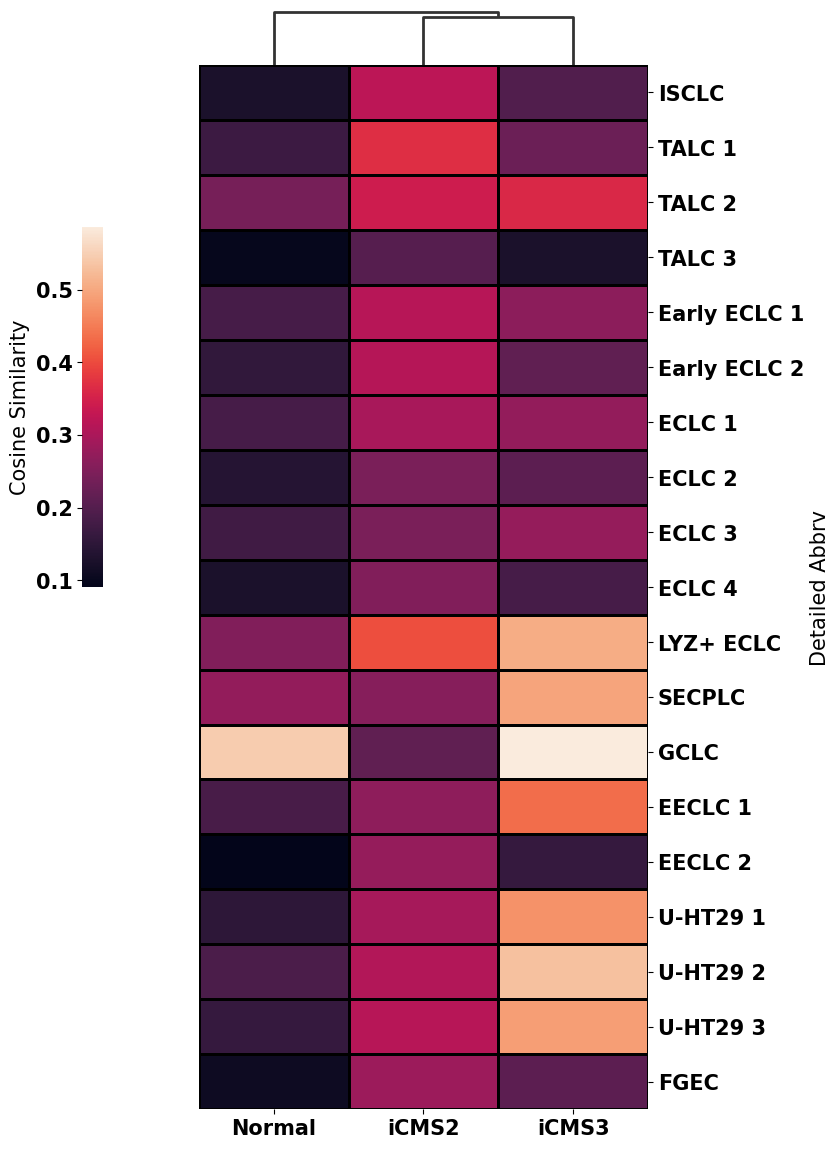

In [35]:
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
similarity_matrix_df = pd.DataFrame(similarity_matrix)
similarity_matrix_df.index = averaged_twdf.index
similarity_matrix_df.columns = averaged_crcdf.index
clustergrid = sns.clustermap(similarity_matrix_df,figsize = (7,12),linewidths=2,
               linecolor = 'k',dendrogram_ratio = 0.05, colors_ratio = 0.5,
               row_cluster = False,cbar_kws={'label': 'Cosine Similarity','location':"left"}
               )
for a in clustergrid.ax_col_dendrogram.collections:
        a.set_linewidth(2)
clustergrid.ax_cbar.set_position([-0.1, 0.5, 0.03, 0.3])

axs = clustergrid.fig.get_axes()
for j in range(0,len(axs)): 
    axs[j].set_xlabel('')
plt.savefig('heatmap_CRC_up_cos.png',dpi = 300,bbox_inches='tight')

In [38]:
transwell_forvis

AnnData object with n_obs × n_vars = 9273 × 16465
    obs: 'n_counts', 'n_genes', 'condition', 'phase', 'mt_frac', 'ribo_frac', 'leiden', 'leiden2', 'leiden3', 'leiden4', 'leiden5', 'leiden6', 'cluster_blind', 'general celltype', 'Detailed Celltype', 'General Cell Types', 'Detailed Cell Types', 'General Abbrv', 'Detailed Abbrv'
    var: 'highly_variable'
    uns: 'Detailed Abbrv_colors', 'Detailed Cell Types_colors', 'General Abbrv_colors', 'General Cell Types_colors', 'cluster_blind_colors', 'condition_colors', 'general celltype_colors', 'leiden', 'leiden2_colors', 'leiden3_colors', 'leiden4_colors', 'leiden5_colors', 'leiden6_colors', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'rank', 'rank_2', 'rank_3', 'residuals', 'scaled', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts', 'raw'
    obsp: 'connectivities', 'distances'

<Figure size 1200x1200 with 0 Axes>

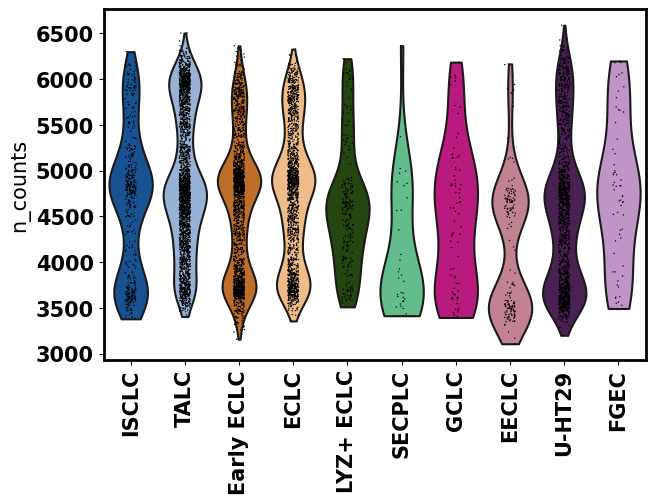

In [41]:
plt.figure(figsize=(8, 8), dpi=150)
t2 = sc.pl.violin(transwell_forvis, 'n_counts',groupby = 'General Abbrv',save = 'qc_counts.png',rotation = 90)

<Figure size 1200x1200 with 0 Axes>

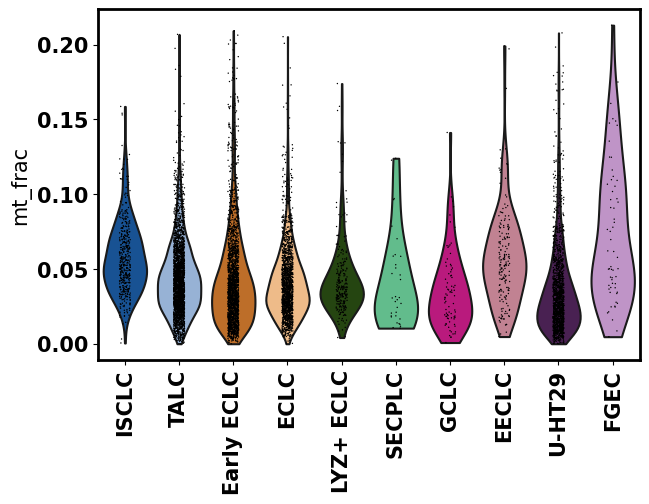

In [40]:
plt.figure(figsize=(8, 8), dpi=150)
t2 = sc.pl.violin(transwell_forvis, 'mt_frac',groupby = 'General Abbrv',save = 'qc_mt.png',rotation = 90)